In [47]:
import synthdata 
from synthdata import * 
import importlib 
importlib.reload(synthdata)

<module 'poo' from 'c:\\Users\\ey\\SynthChat\\poo.py'>

####  Sommaires : 


* Introduction
* Installation and Setup
* Explanation of Methods and Attributes
* Usage Example
* Performance and Limitations


### *1* - Introduction


- In this project, I have developed a Python class called Synthdata, designed to generate synthetic data corresponding to user requirements. With its robust set of methods and attributes, Synthdata empowers users to iteratively create customized datasets using queries.

### *2* - Installation and Setup


- Start the Python interpreter using Python 3.11.0
  Créer un environnement anaconda pour python en utilisant 
  
  => conda create --name pdi python=3.11.0
  
  
- Install requirements.txt => pip install -r requirements.txt


### *3* - Explanation of Methods and Attributes


##### Les Méthodes Principales : 

**-generate_prompt :** Cette fonction permet de créer une chaîne de caractères contenant la description de chaque colonne à partir du dataspec.

**-create_chain :** Cette fonction permet de créer une chaîne longchain, qui est une instance conversationnelle avec une mémoire, permettant d'interagir avec l'utilisateur par des prompts.

**-generate_data :** Cette fonction, basée sur une chaîne longchain créée par create_chain, permet de générer une première version des données synthétiques à partir des contraintes par colonnes venant du dataspec et aussi à partir des contraintes par lignes.

**-handle_user_query :** Cette fonction, toujours basée sur la même instance de chaîne, permet de modifier le dataset généré suivant une nouvelle requête utilisateur.



##### Les Méthodes Auxiliaires :

**-_sanitize_output :** le llm generer le code de cette format '```python  [script] ....```' et cette fonction permet de nettoyer l'output et récuperer le code.


**-execute_code :** - Cette fonction prend le code sous forme de chaîne de caractères, l'écrit dans un fichier .py et l'exécute en utilisant subprocess.

!! Cette fonction exécute le code dans l'environnement anacoda (python) spécifié dés la création d'une instance Synthdata!!

**-run_code_and_get_error :** Cette fonction prend en argument un code au format [str] et l'exécute. Le problème avec cette fonction est qu'il faut s'assurer que le code s'exécute dans le bon environnement. Sinon, il faut mettre debug = False dans le code.

**-run_code_with_debug :** - Cette fonction débogue le code et est utilisée lors de la première génération de code. Elle prend en argument un code, récupère ensuite un message d'erreur et régénère un prompt afin de déboguer le code.

Il faut mettre debug = True pour exécuter le code avec la boucle de débogage, sinon *run-code-with-debug* fonctionne comme *execute-code*.



##### Les attributs :

L'attribut le plus important à mettre en place dès la création d'une instance de Synthdata est le *conda_env_name*. Ce dernier représente le nom de l'environnement qui contient les bibliothèques nécessaires pour ce projet afin d'exécuter les codes générés par le LLM.

Pour les autres attributs tels que chain, dataspec, dataset, etc., ils seront créés au fur et à mesure de l'utilisation des fonctions.

### *4* - Exemple d'usage 

-En premier temps on va créer l'instance d'outils et par la suite explorer les attributs et les méthodes attribuées.

In [8]:
# Création d'une instance SynthData 

conda_env_name = "pdi"
engine_generator = SynthData(conda_env_name = "pdi")

# importer des contraintes par colonnes
dataspec = pd.read_excel("data\dataspecs3.xlsx")

-L'outil peut principalement prendre trois entrées externes : la dataspec, les contraintes par lignes et les requêtes d'utilisateur pour personnaliser le dataset généré. Il prend également en compte la requête pour l'agent Chatplot afin de générer des graphiques sur les données.

-En pratique, dès la création d'une instance, l'outil prend en entrée la dataspec et les contraintes. Une fois que nous avons la dataspec, nous la passons par la méthode **generate-prompt** afin de convertir les descriptions des colonnes en prompts.

In [9]:
# Passage de la dataspec (excel) en  prompt (string)
engine_generator.columns_description = engine_generator.generate_prompt(dataspec)
additional_constraint  = """  Generate dataset with 200 rows please the first name and last name should be corresponded to the email format"""

In [16]:
print(engine_generator.columns_description)

-CLIENT_ID
  Description :  -Unique identifier for each client-
  Range values :  The values should be between 1 and 1000000000

-FIRST_NAME
  Description :  -First name of the client-
 
-LAST_NAME
  Description :  -Last name of the client-
 
-DOB
  Description :  -Date of birth of the client-
  With the following FORMAT : YYYY-MM-DD

-GENDER
  Description :  -Gender of the client-
  MODALITIES : The column contains the respected modalities : Male/Female/other With the following frequencies :  
0.3/0.6/0.1

-EMAIL
  Description :  -Email address of the client-
  With the following FORMAT : lastname.Name@ey.fr

-PHONE
  Description :  -Phone number of the client-
  With the following FORMAT : 10 digits start by +33 7 

-ADDRESS
  Description :  -Residential address of the client-
 
-ACCOUNT_TYPE
  Description :  -Type of bank account-
  MODALITIES : The column contains the respected modalities : Checking/Savings/Business With the following 
frequencies : 0.1/0.8/0.1

-ACCOUNT_BALANCE
  Description :  -Current balance in the account-
  With the following frequencies : A normal distribution with mean = 50 and std = 5
 Range values :  The values should be between 0 and 1000000000

-ACCOUNT_OPEN_DATE
  Description :  -Date when the account was opened-
  With the following FORMAT : YYYY-MM-DD

-LOAN_STATUS
  Description :  -Status of any loan taken by the client-
  MODALITIES : The column contains the respected modalities : Active/Closed/Default
-CREDIT_SCORE
  Description :  -Credit score of the client-
  Range values :  The values should be between 20 and 200

-EMPLOYMENT_STATUS
  Description :  -Employment status of the client-
  MODALITIES : The column contains the respected modalities : Employed/Unemployed/Self-Employed/Retired

Important: Make sure to respect all of these textual and numeric constraints

-Les chaînes de caractères "columns_description" et "additional_constraint" vont être utilisées comme requêtes par la fonction generate_data afin de créer un prompt et générer des données synthétiques.

-La fonction generate_data va demander à ChatGPT de créer un code qui va générer et enregistrer les données synthétiques dans un fichier "fake_data.csv".

--

-La deuxième étape consiste à créer une instance conversationnelle contenant une mémoire, c'est le cerveau qui va interagir avec l'utilisateur afin de générer des données !

In [14]:
# Création d'une instance chain par longchain : 

chain , memory = engine_generator.create_chain()

# Generer les données ! 

dataset = engine_generator.generate_data(engine_generator.columns_description,additional_constraint)

# Si le code plante, pensez à recommencer la cellule.

start run code with debug

run query

Get llm response

Get the code from the llm response

run the code using execute_code

write the code

run the code writed using subprocess

In [30]:
dataset.head()

,CLIENT_ID,FIRST_NAME,LAST_NAME,DOB,GENDER,EMAIL,PHONE,ADDRESS,ACCOUNT_TYPE,ACCOUNT_BALANCE,ACCOUNT_OPEN_DATE,LOAN_STATUS,CREDIT_SCORE,EMPLOYMENT_STATUS
0,534895719,Laura,Santiago,1991-01-14,Female,Santiago.Laura@ey.fr,+33 710433218,"USCGC Robinson, FPO AA 12134",Savings,52,2022-04-18,Closed,94,Self-Employed
1,498972760,Daniel,Shepherd,1996-08-20,Female,Shepherd.Daniel@ey.fr,+33 719600133,"667 Ariel Crossing Suite 628, Isabellaside, TN...",Savings,56,2022-03-26,Default,169,Employed
2,944505602,Claudia,Hernandez,1950-04-17,Female,Hernandez.Claudia@ey.fr,+33 789083863,"41221 Rhodes Flats Suite 010, Davisview, VI 70122",Business,57,2020-06-02,Active,108,Employed
3,106406363,Mary,Solis,1962-08-19,Female,Solis.Mary@ey.fr,+33 779402654,"5422 Rachel Wells Suite 092, Stewartchester, K...",Savings,57,2023-12-27,Default,194,Unemployed
4,857592371,Kyle,Beard,1944-09-07,Female,Beard.Kyle@ey.fr,+33 723511615,"813 Warren Mountain Suite 563, North Heather, ...",Business,55,2023-02-15,Default,40,Employed


=> On remarque bien que les données générées respectent bien les modalités comme les colonnes "ACCOUNT_TYPE", "LOAN_STATUS" et autres avec leurs contraintes fréquentielle, les contraintes textuelles sur les emails ainsi que le nombre de lignes comme mentionné dans additional_constraints.

=> Dans le cas contraire on peut personnaliser les données en utilisant la fonction **handle_user_query**. 

In [33]:
#  On peut tester un exemple qui repose sur la personnalisation des données en modifiant une colonne en fonction d'une autre.
user_query = "Please ensure that the values in the ACCOUNT_BALANCE column for females are greater than 500."

# Customiser la dataset : 
df = engine_generator.handle_user_query(user_query)

write the code

run the code writed using subprocess

In [35]:
df

,CLIENT_ID,FIRST_NAME,LAST_NAME,DOB,GENDER,EMAIL,PHONE,ADDRESS,ACCOUNT_TYPE,ACCOUNT_BALANCE,ACCOUNT_OPEN_DATE,LOAN_STATUS,CREDIT_SCORE,EMPLOYMENT_STATUS
0,534895719,Norman,Carey,2003-03-25,Female,Carey.Norman@ey.fr,+33 710433218,"02622 David Junction Suite 311, Alexischester,...",Savings,500,2022-01-22,Closed,94,Self-Employed
1,498972760,Walter,Salas,2000-03-16,Female,Salas.Walter@ey.fr,+33 719600133,"73225 Vanessa Walk, Lake Leslie, ME 73249",Savings,500,2021-02-21,Default,169,Employed
2,944505602,Justin,Jenkins,1943-02-08,Female,Jenkins.Justin@ey.fr,+33 789083863,"USNV Combs, FPO AA 24640",Business,500,2021-06-29,Active,108,Employed
3,106406363,Holly,Logan,1940-11-24,Female,Logan.Holly@ey.fr,+33 779402654,"4525 Sheppard Lights, Reyeshaven, MP 86455",Savings,500,2019-07-17,Default,194,Unemployed
4,857592371,Emma,Wolfe,1935-12-30,Female,Wolfe.Emma@ey.fr,+33 723511615,"USCGC Patterson, FPO AP 06650",Business,500,2019-04-07,Default,40,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,973569565,William,York,1933-05-18,Female,York.William@ey.fr,+33 780793597,"96615 Savannah Lakes Apt. 182, New Madison, MP...",Business,500,2023-09-18,Closed,28,Self-Employed
196,666759208,Cynthia,Bell,1947-07-13,Other,Bell.Cynthia@ey.fr,+33 782071518,"4611 Shelton Park Apt. 467, Port Gabriella, AS...",Savings,45,2019-12-10,Closed,91,Self-Employed
197,959582085,Kristina,Wilson,1972-09-10,Male,Wilson.Kristina@ey.fr,+33 720377889,"844 Howard Curve, Wilsonhaven, NC 56406",Savings,45,2019-09-09,Active,79,Retired
198,787090381,Dawn,Williams,1977-05-26,Female,Williams.Dawn@ey.fr,+33 725546659,"84550 Pena Ferry, Katherineview, OK 28686",Business,500,2023-01-11,Default,75,Retired


<Axes: xlabel='GENDER'>

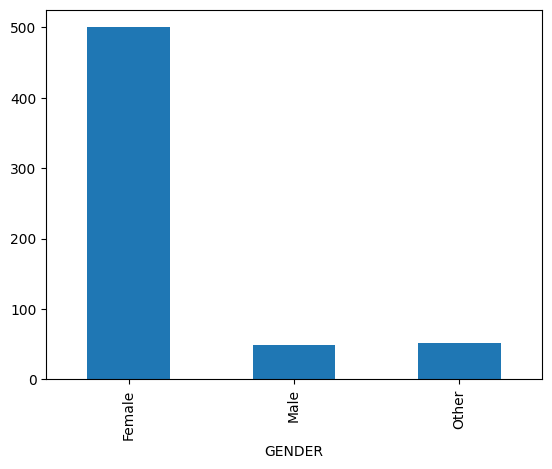

In [42]:
# On peut vérifier dans les données : 

df.groupby(['GENDER'])['ACCOUNT_BALANCE'].mean().plot.bar()

- La dataframe est bien corrigée ! (Sinon, il est recommandé de relancer la cellule.)

La dataframe est bien corrigée ! On peut s'amuser en ajoutant d'autres requêtes pour remarquer qu'on peut personnaliser les données sans les régénérer à zéro. Donc, la contrainte précédente **user_query**  sera toujours respectée.

In [11]:
user_query = "Ajouter une requete de votre choix !"

# Customiser la dataset : 
df = engine_generator.handle_user_query(user_query)

write the code

run the code writed using subprocess

- On peut regarder l'historique dans la conversation : 


Il est important de noter qu'afin d'éviter de dépasser la mémoire à chaque nouvelle requête, je vais conserver uniquement le premier message humain (vue qu'il contient columns_description) et les 3 ou 2 derniers messages entre les messages humains et les messages AI.

In [45]:
engine_generator.chat_history.chat_memory.messages

[HumanMessage(content='Generate synthetic data using Python code with the following columns and their descriptions:\n\n                -CLIENT_ID\n  Description :  -Unique identifier for each client-\n  Range values :  The values should be between 1 and 1000000000\n\n-FIRST_NAME\n  Description :  -First name of the client-\n \n-LAST_NAME\n  Description :  -Last name of the client-\n \n-DOB\n  Description :  -Date of birth of the client-\n  With the following FORMAT : YYYY-MM-DD\n\n-GENDER\n  Description :  -Gender of the client-\n  MODALITIES : The column contains the respected modalities : Male/Female/other With the following frequencies :  0.3/0.6/0.1\n\n-EMAIL\n  Description :  -Email address of the client-\n  With the following FORMAT : lastname.Name@ey.fr\n\n-PHONE\n  Description :  -Phone number of the client-\n  With the following FORMAT : 10 digits start by +33 7 \n\n-ADDRESS\n  Description :  -Residential address of the client-\n \n-ACCOUNT_TYPE\n  Description :  -Type of bank

### *4* - Performance and Limitations





=> L'outil génère des données avec une très bonne performance ; cependant, il peut arriver que le modèle produise un code non déboguable. Dans ce cas, il est nécessaire de redémarrer l'instance et de recommencer à zéro. Pour éviter ce problème, on peut lancer le code en utilisant debug = True, mais il est impératif de s'assurer que la fonction **run_code_and_get_error** exécute le code dans le bon environnement.


=> Pendant la phase d'interaction avec l'outil par le biais de requêtes, il peut planter après plusieurs requêtes. Dans ce cas, il est recommandé de redémarrer l'outil à zéro.

=> La qualité des prompts peut parfois garantir une bonne qualité des données générées.

=> Dans le cas où les données générées ne respectent pas une ou plusieurs contraintes, il est recommandé d'utiliser **handle_user_query** afin de mieux personnaliser les données.

=> Il existe une possibilité d'améliorer le prompt engineering mis en place dans ce code.

=> Il est envisageable de gérer la mémoire de telle sorte que même si l'outil plante. Pendant l'initialisation, il puisse régénérer la dernière version générée pour ne pas avoir à refaire l'itération avec l'outil.